In [5]:
import numpy as np
import os.path as op
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import arviz as az
import matplotlib.pyplot as plt


In [19]:
subs_name = 'first8-subs' #'miguel-subs' # params generated via numrisk/behavior_magjudge/sim_paramsFromFirst8subs.ipynb or ./behavior_simulations/magnitude-ratio-range_sim.ipynb

target_folder = f'/Users/mrenke/git/numrisk/behavior_simulations/data_saved/{subs_name}'
target_folder = f'/Volumes/mrenkeED/data/ds-dnumr/behavior_simulations/data_saved/{subs_name}' #put data on external drive due to storage limits on local device

df = pd.DataFrame()
params = pd.read_csv(f'/Users/mrenke/git/numrisk/behavior_simulations/data_saved/{subs_name}_params.csv')

sub_params = pd.DataFrame(data = {'subject': params.iloc[:,0], 'n1_evidence_sd': params.iloc[:,1], 'n2_evidence_sd': params.iloc[:,2], 'n2_prior_mu':params.iloc[:,3]})

count = 0
for denominator in [4,6, 10, 14, 20,26]:

    for run in range(1,20):
        try:
            trace = az.from_netcdf(op.join(target_folder, f'denom{denominator}_run{run}_trace.netcdf'))
            n1_ev_sd = trace.posterior['n1_evidence_sd'].to_dataframe()
            dc = pd.DataFrame(data={'evid_sd_std': n1_ev_sd.groupby('subject').std()['n1_evidence_sd'],'evid_sd_mu':n1_ev_sd.groupby('subject').mean()['n1_evidence_sd'], 'true_evid_sd_mu': sub_params.set_index('subject')['n1_evidence_sd'] })

            x = 'evid_sd_mu'
            y = 'true_evid_sd_mu'
            z = 'evid_sd_std'

            ccy = pearsonr(dc[x], dc[y])
            ccz = pearsonr(dc[x], dc[z])

            count += 1
            d = pd.DataFrame(data={'denom' : denominator,'run': run, 
                    'evid_sd_mu_true-est_cc': round(ccy[0],3), 
                    'evid_sd_mu_true-est_pv': round(ccy[1],3), 
                    'evid_sd_mu-std_cc': round(ccz[0],3),    
                    'evid_sd_mu-std_pv': round(ccz[1],3),
                    'mean_evid_sd_std' : dc['evid_sd_std'].mean()},
                    index=[count])

            df = pd.concat([df,d ])
        except :
            print('incomplete runs for that denom')


incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom


Text(0.5, 1.0, 'correlation of estimated with true evidence_sd')

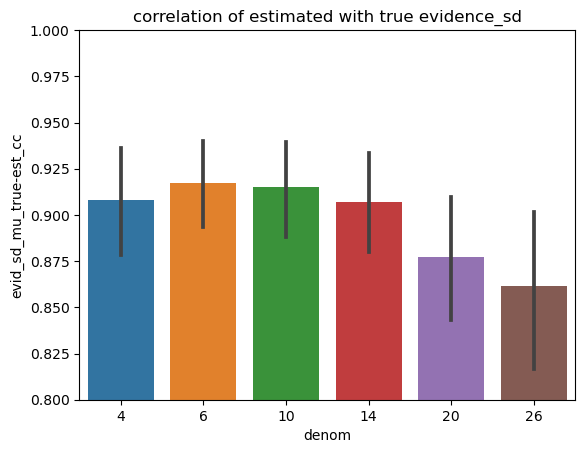

In [20]:
sns.barplot(df, x='denom', y='evid_sd_mu_true-est_cc')
plt.ylim([0.8,1])
plt.title('correlation of estimated with true evidence_sd')

Text(0.5, 1.0, 'mean std of evidence_sd estimate')

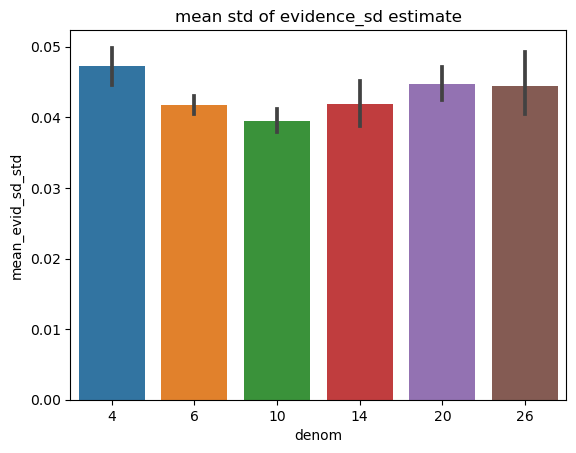

In [21]:
sns.barplot(df, x='denom', y='mean_evid_sd_std')
plt.title('mean std of evidence_sd estimate')

In [15]:
count = 0

a = []
for denominator in [4,6, 10, 14, 20,26]:

    for run in range(1,20):
        try:
            df_sim = pd.read_csv(op.join(target_folder, f'denom{denominator}_run{run}_sim-data.csv'))
            
            l = []
            for i in range(0,len(df_sim)):
                r = df_sim.iloc[i]
                if r['n2'] > r['n1']:
                    if r['choice'] == 1:
                        l.append(1)
                    elif r['choice'] == 0:
                        l.append(0)
                elif r['n2'] < r['n1']:
                    if r['choice'] == 0:
                        l.append(1)
                    elif r['choice'] == 1:
                        l.append(0)
                else:
                    l.append(np.NaN)

            df_sim['accuracy'] = l
            df_sim.groupby('subject')['accuracy'].mean()
            a.append(np.mean(df_sim.groupby('subject')['accuracy'].mean()))
        except :
            print('incomplete runs for that denom')
        


incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom
incomplete runs for that denom


Text(0.5, 1.0, 'overall accuracy')

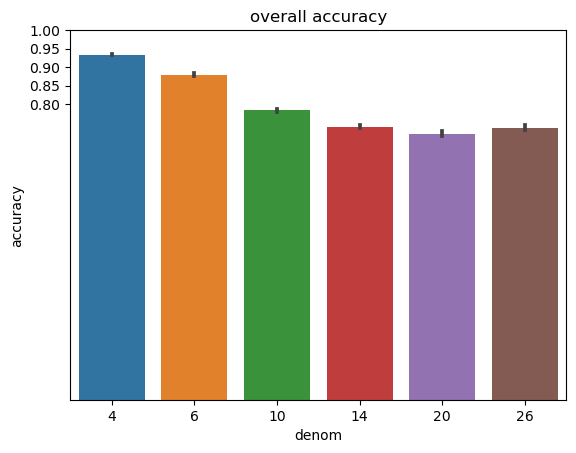

In [17]:
df['accuracy'] = a
sns.barplot(df, x='denom', y='accuracy')
plt.yticks(np.arange(.8,1.05, 0.05))
plt.title('overall accuracy')